In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2025-07-23 13:37:06--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2025-07-23 13:37:06 (5.32 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [2]:
import pandas as pd

df = pd.read_csv('BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
                 parse_dates=["Date"],
                 index_col=["Date"])

df

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.654990,124.304660,124.751660,122.563490
2013-10-02,BTC,125.455000,123.654990,125.758500,123.633830
2013-10-03,BTC,108.584830,125.455000,125.665660,83.328330
2013-10-04,BTC,118.674660,108.584830,118.675000,107.058160
2013-10-05,BTC,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292


In [3]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "price"})

bitcoin_prices

,price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


Text(0.5, 1.0, 'BTC Price 01-10-2013 to 18-05-2021')

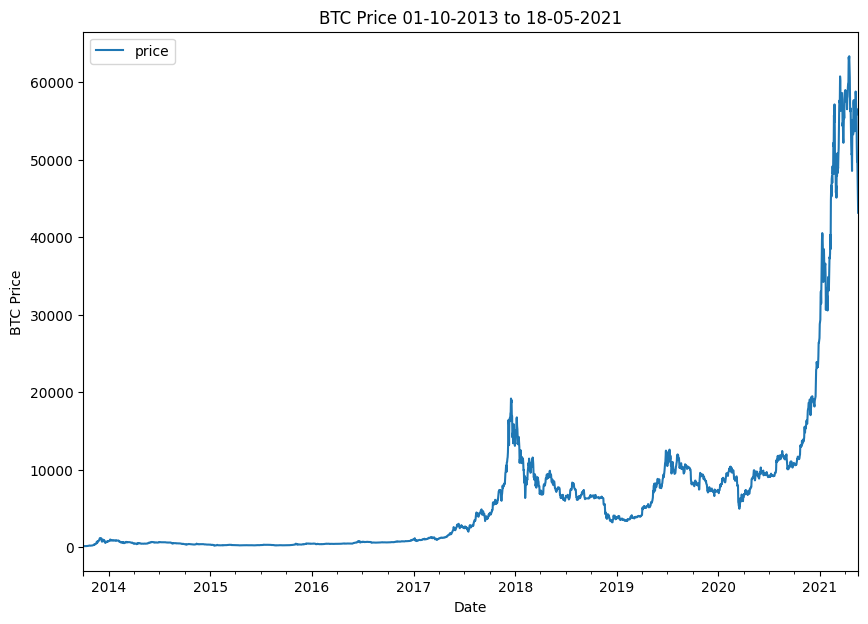

In [4]:
import matplotlib.pyplot as plt

bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("BTC Price 01-10-2013 to 18-05-2021")

In [5]:
import csv
from datetime import datetime

timesteps = []
btc_price = []

with open("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
    csv_reader = csv.reader(f, delimiter=",")
    next(csv_reader, None)
    for line in csv_reader:
        timesteps.append(datetime.strptime(line[1], "%Y-%m-%d"))
        btc_price.append(float(line[2])) # get the closing price as float

# View first 10 of each

timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

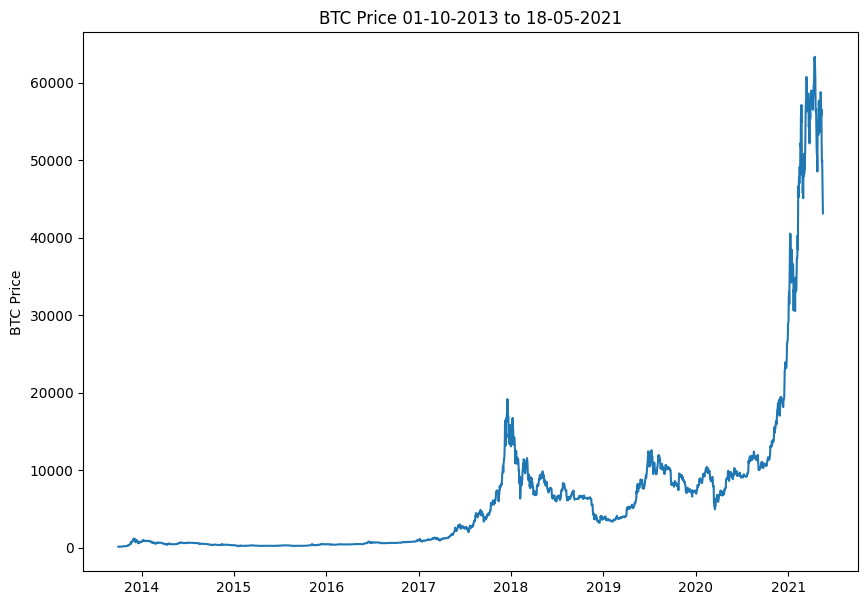

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("BTC Price 01-10-2013 to 18-05-2021")
plt.plot(timesteps, btc_price)

In [7]:
#  WRONG WAY

timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [8]:
#  WRONG WAY

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps,  #dates
                                                    prices,  # prices
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

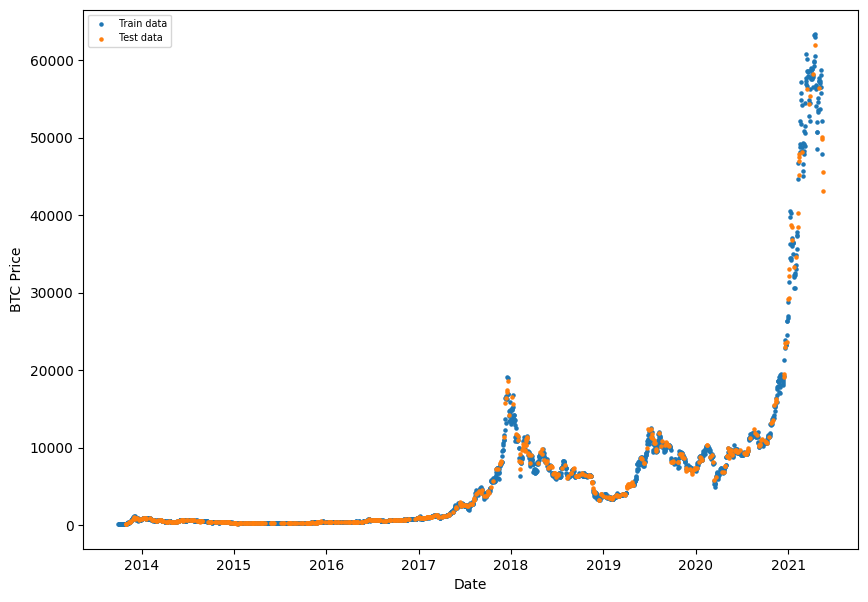

In [9]:
#  WRONG WAY

plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize="x-small")
plt.show()

In [10]:
####
# RIGHT WAY
####

In [11]:
split_size = int(0.8 * len(prices))

X_train, y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2229, 2229, 558, 558)

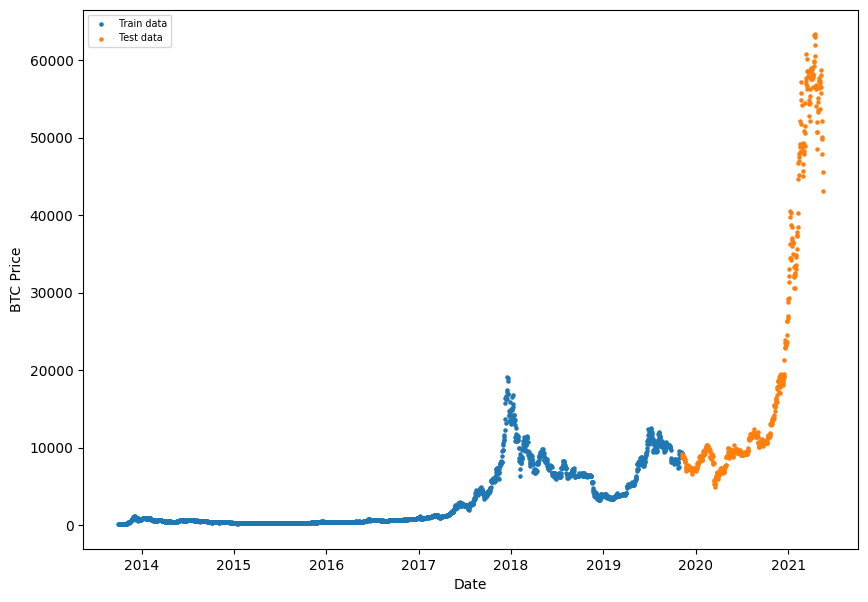

In [12]:
#  WRONG WAY

plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize="x-small")
plt.show()

In [13]:
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
    """
    plots teimesteps (a series of points in ttime against values a series of values across timestmeps)

    :param timesteps: array of timestemp values
    :param values:  array of values across time
    :param format:  style of plot
    :param start: where to start the plot (setting a value will index from start of timesteps
    :param end:  where to end the plot
    :param label:  where to end the plot
    :return:
    """

    plt.plot(timesteps[start:end], values, format, label=label)
    plt.xlabel("Time")
    plt.ylabel("BTC Price")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

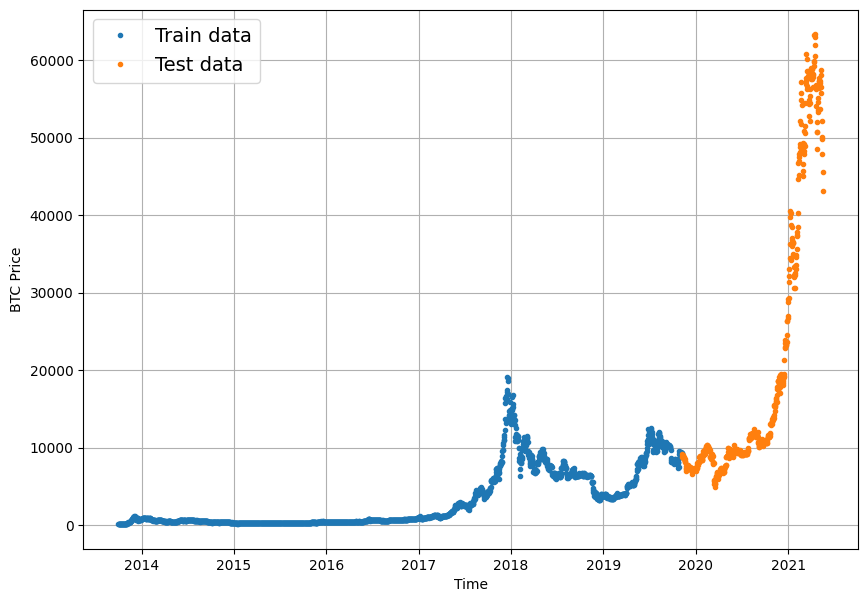

In [14]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

Model experiments

* 0. Native model (baseline
* 1. Dense model
* 2. same as 1
* 3. same as 1
* 4. conv1d
* 5. lstm
* 6. same as 1 + multivariate data
* 7. n-beats algorithm
* 8. ensemble
* 9. future prediction model
* 10. same as 1 but with turkey

In [15]:
# Naive forecast

naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

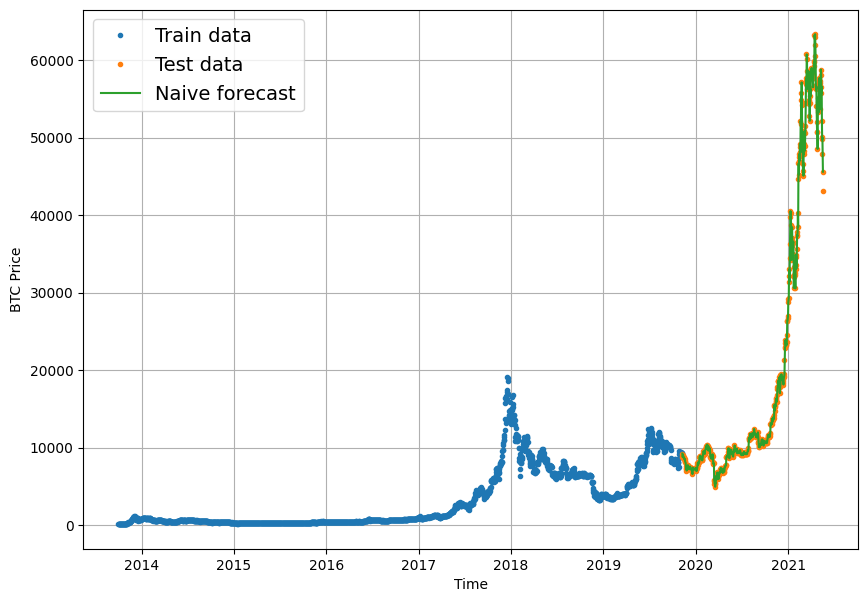

In [16]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast")

In [17]:
## Evaluating a time series model

import tensorflow as tf

#Mean absolute scale error implementation

def mean_absolute_scaled_error(y_true, y_pred):
    """
    Implement MASE (assuming not seasonality of data)
    """

    mae = tf.reduce_mean(tf.abs(y_true - y_pred))
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))
    return mae / mae_naive_no_season

In [18]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred= naive_forecast).numpy()

np.float64(0.9995699939182624)

In [19]:
def evaluate_preds(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)

    mae = tf.reduce_mean(tf.abs(y_true - y_pred))
    mse = tf.reduce_mean(tf.square(y_true - y_pred))
    rmse = tf.sqrt(mse)
    mape = tf.reduce_mean(tf.abs((y_true - y_pred) / y_true)) * 100
    mase = mean_absolute_scaled_error(y_true, y_pred)  # Custom implementation

    return {
        "mae": mae.numpy(),
        "mse": mse.numpy(),
        "rmse": rmse.numpy(),
        "mape": mape.numpy(),
        "mase": mase.numpy() if isinstance(mase, tf.Tensor) else mase
    }

In [20]:
naive_results = evaluate_preds(y_true=y_test[1:], y_pred=naive_forecast)

naive_results

{'mae': np.float32(567.9802),
 'mse': np.float32(1147547.0),
 'rmse': np.float32(1071.2362),
 'mape': np.float32(2.516525),
 'mase': np.float32(0.99957)}

In [21]:
HORIZON=1
WINDOW_SIZE=7

In [22]:
def get_labelled_window(x, horizon=HORIZON):
    """
    Creates labels for windowed dataset.
    e.g. if horizon=1
    input [0,1,2,3,4,5,6,7] -> Output: ([0,1,2,3,4,5,6], [7])
    """
    return x[:, :-horizon], x[:, -horizon:]

In [23]:
test_window, test_labels = get_labelled_window(tf.expand_dims(tf.range(8)+1, axis=0))
test_window, test_labels

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[8]], dtype=int32)>)

In [24]:
import numpy as np

def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
    """
    Turns a 1d array in a 2d array of sequential labelled windows of window_size with horizon size labels
    """
    window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
    window_indexes = window_step + np.expand_dims(
        np.arange(len(x)-(window_size+horizon-1)), axis=0
    ).T

    windowed_array = x[window_indexes]
    windows, labels = get_labelled_window(windowed_array, horizon=horizon)
    return windows, labels


In [25]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

In [26]:
for i in range(3):
    print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [27]:
# NB: tf.keras.preprocessing.timeseries_dataset_from_array() does everything above does

In [28]:
# make train/test splits

def make_train_test_splits(windows, labels, test_split=0.2):
    """
    Split matching pairs of windows and labels intro train and test splits
    """
    split_size = int(len(windows) * (1-test_split))
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows,  test_windows, train_labels, test_labels

In [29]:
# make a modelling checkpoint callback

import os

def create_model_checkpoint(model_name, save_path="model_experiments"):
    model_name = f"{model_name}.keras"
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                              save_best_only=True,
                                              verbose=0)

In [30]:
## Model 1: Dense model (window=7, horizon=1)
# Dense layer (128, Relu) output with linear activation
# Adam, MAE
# Batch=128 (not 32)
# 100 epochs

In [31]:
train_windows,  test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential

tf.random.set_seed(42)

model_1 = Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(HORIZON, activation="linear")
], name="model_1_dense")

model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])



In [33]:
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name = model_1.name)])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 2337.3896 - mae: 2337.3896 - mse: 15008395.0000 - val_loss: 2798.0183 - val_mae: 2798.0183 - val_mse: 18458094.0000
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 450.9140 - mae: 450.9140 - mse: 668919.3750 - val_loss: 1888.1167 - val_mae: 1888.1167 - val_mse: 8614710.0000
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 239.9843 - mae: 239.9843 - mse: 264226.1250 - val_loss: 1353.0187 - val_mae: 1353.0187 - val_mse: 5019376.5000
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 203.5786 - mae: 203.5786 - mse: 204758.9688 - val_loss: 1178.1172 - val_mae: 1178.1172 - val_mse: 4151469.0000
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 190.5185 - mae: 190.5185 - mse: 183848.8438 - val_loss: 1032.4991 - val_mae: 1032.4991 - val_mse: 3471796.7500
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 177.4197 - mae: 177.4197 - mse: 161579.1406 - val_loss: 1008.9507 - val_mae: 1008.950

In [34]:
model_1.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 286.6812 - mae: 286.6812 - mse: 346305.7812


[570.9273071289062, 570.9273071289062, 1176004.625]

In [35]:
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense.keras")

model_1.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 282.7900 - mae: 282.7900 - mse: 345232.2812


[566.3765258789062, 566.3765258789062, 1165759.0]

In [36]:
## making forecasts with a model
def make_preds(model, input_data):
    """
    uses model to make prediction on input_Data
    """
    forecast = model.predict(input_data)
    return tf.squeeze(forecast)

In [37]:
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8848.651, 8794.976, 9054.374, 8775.654, 8731.445, 8749.296,
        8670.747, 8531.085, 8462.759, 8532.935], dtype=float32)>)

In [38]:
tf.squeeze(test_labels.shape), model_1_preds.shape

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([556,   1], dtype=int32)>,
 TensorShape([556]))

In [39]:
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), y_pred=model_1_preds)
model_1_results

{'mae': np.float32(566.37646),
 'mse': np.float32(1165759.1),
 'rmse': np.float32(1079.7032),
 'mape': np.float32(2.5316947),
 'mase': np.float32(0.99496657)}

In [40]:
naive_results

{'mae': np.float32(567.9802),
 'mse': np.float32(1147547.0),
 'rmse': np.float32(1071.2362),
 'mape': np.float32(2.516525),
 'mase': np.float32(0.99957)}

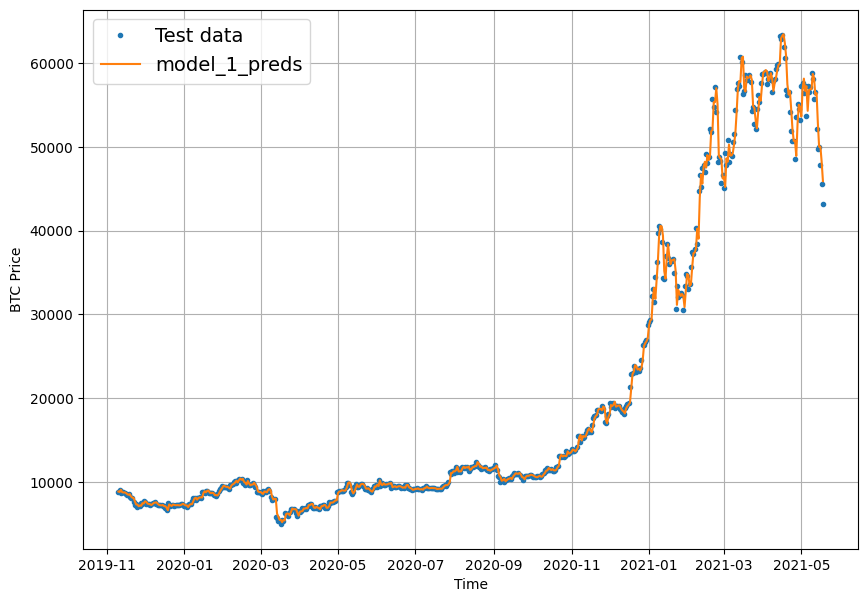

In [41]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 label="Test data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 format="-",
                 label="model_1_preds")

##### SAME BUT WINDOW IS 30

In [42]:
WINDOW30 = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW30, horizon=HORIZON)
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels)

In [43]:
model_2 = Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(HORIZON, activation="linear")
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

In [44]:
model_2.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name = model_2.name)])

In [45]:
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense.keras")
model_2.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 313.2094 - mae: 313.2094 - mse: 405997.0312


[616.4238891601562, 616.4238891601562, 1353744.0]

In [46]:
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [47]:
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), y_pred=model_2_preds)
model_2_results

{'mae': np.float32(616.4239),
 'mse': np.float32(1353744.1),
 'rmse': np.float32(1163.5051),
 'mape': np.float32(2.7937298),
 'mase': np.float32(1.077515)}

In [48]:
model_1_results

{'mae': np.float32(566.37646),
 'mse': np.float32(1165759.1),
 'rmse': np.float32(1079.7032),
 'mape': np.float32(2.5316947),
 'mase': np.float32(0.99496657)}

In [49]:
# conv1d

In [50]:
WINDOW_SIZE = 7
HORIZON = 1

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

In [51]:
len(full_windows)

2780

In [52]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows)

2224

In [53]:
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [54]:
import tensorflow as tf
from tensorflow.keras import layers

expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=-1))

In [55]:
print(f"Original shape: {x.shape}")
print(f"Expanded shape: {expand_dims_layer(x).shape}")
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [56]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=-1)),
    layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
    layers.Dense(HORIZON)
], name="model_4_conv1D")

model_4.compile(loss="mae", optimizer=tf.keras.optimizers.Adam())

In [57]:
model_4.fit(x=train_windows,
            y=train_labels,
            batch_size=128,
            epochs=100,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name = model_4.name)])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 2922.3169 - val_loss: 10015.7959
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1210.8721 - val_loss: 5470.8096
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 782.5145 - val_loss: 3764.9653
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 537.4070 - val_loss: 2742.2317
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 415.6693 - val_loss: 2197.4033
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 346.6187 - val_loss: 1895.2289
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 303.5757 - val_loss: 1674.1864
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 267.5222 - val_loss: 1462.3630
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 237.2613 - val_loss: 1312.7836
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 218.7985 - val_loss: 1238.2621
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 211.2548 - val_loss: 1218.1904
Epoc

In [58]:
model_4.summary()

Model: "model_4_conv1D"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_1 (Lambda)               │ (None, 7, 1)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 7, 128)         │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7, 1)           │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,693 (10.52 KB)

 Trainable params: 897 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,796 (7.02 KB)

In [59]:
model_4.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 597.3721


1220.129638671875

In [60]:
# RNN LSTM

In [61]:
inputs = layers.Input(shape=(WINDOW_SIZE,))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
#x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation='relu')(x)
#x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name = "model_5_LSTM")

In [62]:
model_5.compile(loss="mae", optimizer=tf.keras.optimizers.Adam())

In [63]:
model_5.fit(x=train_windows,
            y=train_labels,
            epochs=200,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name = model_5.name)])

Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 279ms/step - loss: 2525.4521 - val_loss: 10071.6543
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1259.0734 - val_loss: 1402.1224
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 252.3642 - val_loss: 1089.8218
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 196.8942 - val_loss: 1064.9159
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 188.3772 - val_loss: 1109.4471
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 184.4979 - val_loss: 1113.0073
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 183.8347 - val_loss: 1092.3573
Epoch 8/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 182.1191 - val_loss: 1087.8716
Epoch 9/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 181.0852 - val_loss: 1083.0344
Epoch 10/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 179.9666 - val_loss: 1080.2208
Epoch 11/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 178.8915 - val_loss: 1067.6896
Ep

In [64]:
model_5.evaluate(test_windows, test_labels)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 285.8040


575.3760375976562

In [65]:
model_5_preds = make_preds(model_5, test_windows)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


In [66]:
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels), y_pred=model_5_preds)
model_5_results


{'mae': np.float32(575.3761),
 'mse': np.float32(1178077.5),
 'rmse': np.float32(1085.3928),
 'mape': np.float32(2.56993),
 'mase': np.float32(1.0107764)}

In [67]:
naive_results

{'mae': np.float32(567.9802),
 'mse': np.float32(1147547.0),
 'rmse': np.float32(1071.2362),
 'mape': np.float32(2.516525),
 'mase': np.float32(0.99957)}

In [68]:
## MULTIVARIATE

In [69]:
bitcoin_prices.head()

,price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [70]:
#block reward date
block_reward_1 = 50 # not in dataset
block_reward_2 = 25 # 8.11.2012
block_reward_3 = 12.5 # 9.7.206
block_reward_4 = 6.25 # 18.5.2020

#block reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days


In [71]:
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block

,price,block_reward
Date,,
2013-10-01,123.654990,25
2013-10-02,125.455000,25
2013-10-03,108.584830,25
2013-10-04,118.674660,25
2013-10-05,121.338660,25
...,...,...
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25


<Axes: xlabel='Date'>

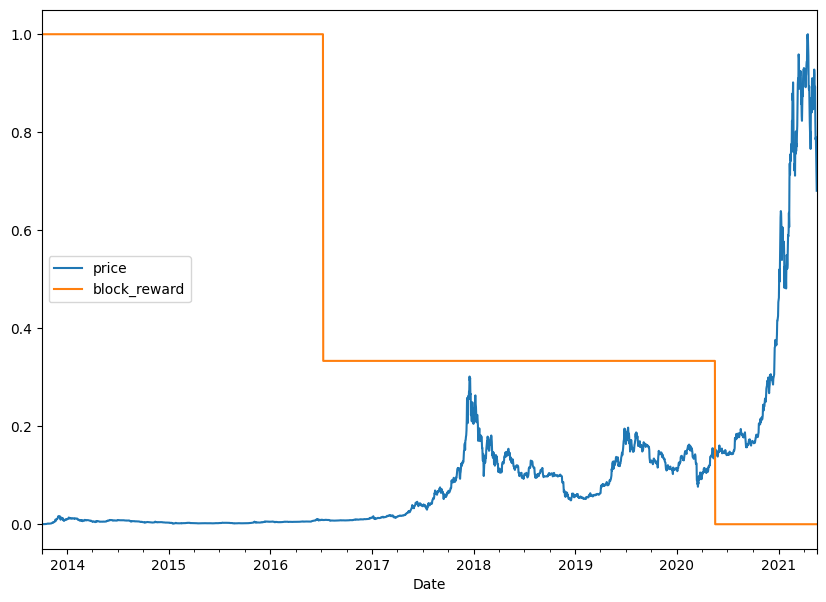

In [72]:
from sklearn.preprocessing import minmax_scale

scaled_price_block_df = pd.DataFrame(
    minmax_scale(bitcoin_prices_block[["price", "block_reward"]]),
    columns =bitcoin_prices_block.columns,
    index = bitcoin_prices_block.index)

scaled_price_block_df.plot(figsize=(10, 7))

In [73]:
HORIZON = 1
WINDOW_SIZE = 7

bitcoin_prices_windowed = bitcoin_prices_block.copy()


for i in range(WINDOW_SIZE): # shift values for each step in WINDOW SIZE
    bitcoin_prices_windowed[f"price_{i+1}"] = (
        bitcoin_prices_windowed[f"price"].shift(periods=i+1))

bitcoin_prices_windowed

,price,block_reward,price_1,price_2,price_3,price_4,price_5,price_6,price_7
Date,,,,,,,,,
2013-10-01,123.654990,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.455000,25,123.654990,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.584830,25,125.455000,123.654990,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.674660,25,108.584830,125.455000,123.654990,NaN,NaN,NaN,NaN
2013-10-05,121.338660,25,118.674660,108.584830,125.455000,123.654990,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679


In [74]:
X = bitcoin_prices_windowed.dropna().drop('price', axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()['price'].astype(np.float32)

In [75]:
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [76]:
tf.random.set_seed(42)
model_6 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
   # layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

model_6.compile(loss="mae",
                optimizer = tf.keras.optimizers.Adam())

In [77]:
model_6.fit(x=X_train, y=y_train,
            epochs=200,
            batch_size=128,
            verbose=1,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name = model_6.name)])

Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 1198.0897 - val_loss: 2028.1621
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 284.7870 - val_loss: 1295.9840
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 227.5053 - val_loss: 1169.5775
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 202.9543 - val_loss: 1182.6389
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 196.9217 - val_loss: 1101.0588
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 186.0729 - val_loss: 1096.4525
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 180.5434 - val_loss: 1025.7712
Epoch 8/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 170.8109 - val_loss: 959.0068
Epoch 9/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 165.0661 - val_loss: 929.5878
Epoch 10/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 157.7523 - val_loss: 885.8542
Epoch 11/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 151.8064 - val_loss: 840.2833
Epoch 12/2

In [78]:
model_6.evaluate(X_test, y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 283.6055


570.7376098632812

In [79]:
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8795.987, 8765.54 , 9032.263, 8738.593, 8718.527, 8708.993,
       8651.245, 8483.663, 8428.63 , 8508.31 ], dtype=float32)>

In [80]:
model_6_results = evaluate_preds(y_true=y_test, y_pred=model_6_preds)

In [81]:
model_6_results

{'mae': np.float32(570.73755),
 'mse': np.float32(1158228.6),
 'rmse': np.float32(1076.2103),
 'mape': np.float32(2.5542226),
 'mase': np.float32(1.0026278)}

In [82]:
model_1_results

{'mae': np.float32(566.37646),
 'mse': np.float32(1165759.1),
 'rmse': np.float32(1079.7032),
 'mape': np.float32(2.5316947),
 'mase': np.float32(0.99496657)}

In [83]:
# N-beats algorythm

In [84]:
class NBeatsBlock(tf.keras.layers.Layer):
    def __init__(self,
                 input_size: int,
                 theta_size: int,
                 horizon: int,
                 n_neurons: int,
                 n_layers: int,
                 **kwargs):
        super().__init__(**kwargs)
        self.input_size = input_size
        self.theta_size = theta_size
        self.horizon = horizon
        self.n_neurons = n_neurons
        self.n_layers = n_layers

        self.hidden = [tf.keras.layers.Dense(n_neurons, activation='relu') for _ in range(n_layers)]
        self.theta_layer = tf.keras.layers.Dense(theta_size, activation='linear', name='theta')


    def call(self, inputs):
        x = inputs
        for layer in self.hidden:
            x = layer(x)
        theta = self.theta_layer(x)
        backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon]
        return backcast, forecast

In [85]:
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON,
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [86]:
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE)+1, axis=0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [87]:
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
backcast.numpy(), forecast.numpy()

(array([[-0.11805955,  0.41039643, -0.39342898, -0.03830457, -0.28710365,
         -0.21247655, -0.7581919 ]], dtype=float32),
 array([-0.53816235], dtype=float32))

In [88]:
HORIZON = 1
WINDOW_SIZE = 7

In [89]:
bitcoin_prices_nbeats = bitcoin_prices.copy()

for i in range(WINDOW_SIZE):
    bitcoin_prices_nbeats[f"price+{i+1}"] = bitcoin_prices_nbeats['price'].shift(periods=i+1)

bitcoin_prices_nbeats

,price,price+1,price+2,price+3,price+4,price+5,price+6,price+7
Date,,,,,,,,
2013-10-01,123.654990,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.455000,123.654990,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.584830,125.455000,123.654990,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.674660,108.584830,125.455000,123.654990,NaN,NaN,NaN,NaN
2013-10-05,121.338660,118.674660,108.584830,125.455000,123.654990,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-05-14,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679


In [90]:
X = bitcoin_prices_nbeats.dropna().drop('price', axis=1)
y = bitcoin_prices_nbeats.dropna()['price']

split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [91]:
# time to make our dataset performant using tf.data API

train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

In [92]:
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [93]:
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

In [94]:
# before we can craft our N-Beats model we need two layers for the residual connections (subtract and add

tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

subtracted = layers.subtract([tensor_1, tensor_2])
added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted tensors: {subtracted.numpy()}")
print(f"Added tensors: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted tensors: [10 10 10 10 10 10 10 10 10 10]
Added tensors: [10 12 14 16 18 20 22 24 26 28]


The n-beats algorithm uses double residual stacking to help train its deeper architecture

In [95]:
%%time

tf.random.set_seed(42)

# 1. Setup and instance of NBeatsBlock
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. create input to stack
stack_input = layers.Input(shape=(INPUT_SIZE,), name="stack_input")

# 3. create initial backcast and forecast input
residuals, forecast = nbeats_block_layer(stack_input)

# 4. create stacks of bllock layers
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already created in 3.
    # 5. the NBeatsBlock to calculate the backcast as well as the forecast
    backcast, block_forecast = NBeatsBlock(input_size=INPUT_SIZE,
                                           theta_size = THETA_SIZE,
                                           horizon=HORIZON,
                                           n_neurons = N_NEURONS,
                                           n_layers = N_LAYERS,
                                           name=f"NBeatsBlock_{i}")(residuals) # pass in the residuals

    #  6. Create the double residual stacking
    residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
    forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. put the stack model together
model_7 = tf.keras.Model(inputs = stack_input, outputs = forecast, name="model_7_nbeats")

# 8. compile
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# 9. fit
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                        patience=200,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])


Epoch 935: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 1283: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 1383: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 4min 37s, sys: 20.2 s, total: 4min 58s
Wall time: 3min 50s


In [96]:
model_7.evaluate(test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 570.2534


570.25341796875

In [97]:
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8817.267, 8752.63 , 9011.901, 8752.407, 8724.472, 8728.596,
       8648.101, 8493.687, 8449.82 , 8498.531], dtype=float32)>

In [98]:
model_7_results = evaluate_preds(y_true=y_test, y_pred=model_7_preds)
model_7_results

{'mae': np.float32(570.25336),
 'mse': np.float32(1160913.5),
 'rmse': np.float32(1077.457),
 'mape': np.float32(2.5957878),
 'mase': np.float32(1.0017772)}

In [107]:
model_1_results

{'mae': np.float32(566.37646),
 'mse': np.float32(1165759.1),
 'rmse': np.float32(1079.7032),
 'mape': np.float32(2.5316947),
 'mase': np.float32(0.99496657)}

In [108]:
# Ensemble model 8

In [114]:
def get_ensemble_models(horizon=HORIZON,
                         train_data=train_dataset,
                         test_data= test_dataset,
                         num_iter=10,
                         num_epochs=1000,
                         loss_fns=['mae', 'mse', 'mape']):
   """
   Returns a list of num_iter models each trained on MAE, MSE and MAPE loss
   for ex, if num_iter=10, a list of 30 trained models will be return 1)*len(['mae', 'mse', 'mape'])
   """
   ensemble_models = []
   for i in range(num_iter):
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing {loss_function} for {num_epochs} epochs, model number: {i}")

      model = tf.keras.Sequential([
          #initialize dense layers with normal distribution for estimating prediction intervals
          layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
          layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
          layers.Dense(HORIZON)
      ])

      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                     patience=200,
                                                     restore_best_weights=True),
                    tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                         patience=100,
                                                         verbose=1)
                ])
      ensemble_models.append(model)
   return ensemble_models

In [115]:
%%time

ensemble_models = get_ensemble_models(num_iter=5, num_epochs=1000)

Optimizing model by reducing mae for 1000 epochs, model number: 0

Epoch 795: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing mse for 1000 epochs, model number: 0

Epoch 246: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 346: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing mape for 1000 epochs, model number: 0

Epoch 181: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 489: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 589: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing mae for 1000 epochs, model number: 1

Epoch 947: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing mse for 1000 epochs, model number: 1

Epoch 352: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 452: ReduceLROnPlateau

In [116]:
ensemble_models

[<Sequential name=sequential_2, built=True>,
 <Sequential name=sequential_3, built=True>,
 <Sequential name=sequential_4, built=True>,
 <Sequential name=sequential_5, built=True>,
 <Sequential name=sequential_6, built=True>,
 <Sequential name=sequential_7, built=True>,
 <Sequential name=sequential_8, built=True>,
 <Sequential name=sequential_9, built=True>,
 <Sequential name=sequential_10, built=True>,
 <Sequential name=sequential_11, built=True>,
 <Sequential name=sequential_12, built=True>,
 <Sequential name=sequential_13, built=True>,
 <Sequential name=sequential_14, built=True>,
 <Sequential name=sequential_15, built=True>,
 <Sequential name=sequential_16, built=True>]

In [120]:
#make  predictions with ensemble

def make_ensemble_preds(ensemble_models, data):
    ensemble_preds = []
    for model in ensemble_models:
        ensemble_preds.append(model.predict(data))
    return tf.constant(tf.squeeze(ensemble_preds))

In [121]:
%%time

emsemble_preds = make_ensemble_preds(ensemble_models=ensemble_models, data=test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
CPU times: user 3.49 s, sys: 121 ms, total: 3.61 s
Wall time: 3.58 s


In [124]:
ensemble_mean = tf.reduce_mean(emsemble_preds, axis=1)

In [122]:
ensemble_results = evaluate_preds(y_true=y_test, y_pred=emsemble_preds)
ensemble_results

{'mae': np.float32(577.19183),
 'mse': np.float32(1176819.1),
 'rmse': np.float32(1084.813),
 'mape': np.float32(2.6155775),
 'mase': np.float32(1.0139662)}